# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

<div class="span5 alert alert-info">
### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

In [4]:
pd.options.display.max_columns = 100

In [5]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,occupbroad,workinschool,email,computerskills,specialskills,firstname,sex,race,h,l,call,city,kind,adid,fracblack,fracwhite,lmedhhinc,fracdropout,fraccolp,linc,col,expminreq,schoolreq,eoe,parent_sales,parent_emp,branch_sales,branch_emp,fed,fracblack_empzip,fracwhite_empzip,lmedhhinc_empzip,fracdropout_empzip,fraccolp_empzip,linc_empzip,manager,supervisor,secretary,offsupport,salesrep,retailsales,req,expreq,comreq,educreq,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,1,0,0,1,0,Allison,f,w,0.0,1.0,0.0,c,a,384.0,0.989360,0.005500,9.527484,0.274151,0.037662,8.706325,1.0,5,,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,6,1,1,1,0,Kristen,f,w,1.0,0.0,0.0,c,a,384.0,0.080736,0.888374,10.408828,0.233687,0.087285,9.532859,0.0,5,,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,1,1,0,1,0,Lakisha,f,b,0.0,1.0,0.0,c,a,384.0,0.104301,0.837370,10.466754,0.101335,0.591695,10.540329,1.0,5,,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,5,0,1,1,1,Latonya,f,b,1.0,0.0,0.0,c,a,384.0,0.336165,0.637370,10.431908,0.108848,0.406576,10.412141,0.0,5,,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,5,1,1,1,0,Carrie,f,w,1.0,0.0,0.0,c,a,385.0,0.397595,0.180196,9.876219,0.312873,0.030847,8.728264,0.0,some,,1.0,9.4,143.0,9.4,143.0,0.0,0.204764,0.727046,10.619399,0.070493,0.369903,10.007352,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [6]:
# Your work here.

### Import additional libraries

In [7]:
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline


### Inspect the data

In [8]:
# What is the shape of the DataFrame?
data.shape

(4870, 65)

In [9]:
# Does the DataFrame contain any null values?
data.any().isnull()[data.any().isnull() == True]
# No

Series([], dtype: bool)

In [10]:
# Check summary statistics of the data.
data.describe()

,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,occupbroad,workinschool,email,computerskills,specialskills,h,l,call,adid,fracblack,fracwhite,lmedhhinc,fracdropout,fraccolp,linc,col,eoe,parent_sales,parent_emp,branch_sales,branch_emp,fed,fracblack_empzip,fracwhite_empzip,lmedhhinc_empzip,fracdropout_empzip,fraccolp_empzip,linc_empzip,manager,supervisor,secretary,offsupport,salesrep,retailsales,req,expreq,comreq,educreq,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind
count,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4784.000000,4784.000000,4784.000000,4784.000000,4784.000000,4784.000000,4870.000000,4870.000000,1672.000000,1722.000000,608.000000,658.000000,3102.000000,1918.000000,1918.000000,1908.000000,1918.000000,1918.000000,1918.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000
mean,3.618480,3.661396,7.842916,0.052772,0.411499,0.097125,0.448049,215.637782,3.481520,0.559548,0.479261,0.820534,0.328747,0.502259,0.497741,0.080493,651.777832,0.310831,0.542772,10.147275,0.185674,0.213816,9.550801,0.719507,0.291170,587.686035,2287.051025,196.050522,755.416992,0.114765,0.079096,0.843764,10.655662,0.101692,0.333872,10.031516,0.152156,0.077207,0.332854,0.118686,0.151129,0.167967,0.787269,0.435318,0.124846,0.106776,0.437166,0.072690,0.082957,0.030390,0.085010,0.213963,0.267762,0.154825,0.165092
std,0.714997,1.219126,5.044612,0.223601,0.492156,0.296159,0.497345,148.127551,2.038036,0.496492,0.499621,0.383782,0.469806,0.500051,0.500051,0.272079,388.690582,0.332473,0.329467,0.345780,0.081747,0.169305,0.557097,0.449287,0.454347,2907.629395,8902.843750,896.510864,1665.165039,0.318791,0.149742,0.182991,0.441931,0.071293,0.192012,0.567816,0.359208,0.266945,0.471274,0.323461,0.358204,0.373869,0.409275,0.495846,0.330582,0.308866,0.496083,0.259649,0.275854,0.171677,0.278932,0.410141,0.442847,0.361773,0.371308
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.004814,8.841738,0.000000,0.030847,8.507345,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005500,9.170247,0.000000,0.030847,8.662505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,27.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,306.250000,0.045275,0.252164,9.965053,0.139711,0.092559,9.220489,0.000000,0.000000,12.975000,98.000000,13.000000,97.000000,0.000000,0.007125,0.824140,10.448976,0.047958,0.201971,9.691531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,6.000000,0.000000,0.000000,0.000000,0.000000,267.000000,4.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,647.000000,0.159950,0.571833,10.144078,0.190751,0.145053,9.438432,1.000000,0.000000,33.350000,220.000000,34.900000,200.000000,0.000000,0.017404,0.900727,10.666441,0.087009,0.288414,9.914428,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,4.000000,9.000000,0.000000,1.000000,0.000000,1.000000,313.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,979.750000,0.516854,0.873805,10.342871,0.238196,0.284315,9.668208,1.000000,1.000000,133.099998,700.000000,86.69999

In [11]:
#for column in data.columns:
#    print(column)

In [12]:
# Check if the data set is balanced with respect to gender.
data.race.value_counts()

w    2435
b    2435
Name: race, dtype: int64

In [13]:
# Check if the data set is balanced with respect to calls.
data.call.value_counts()

0.0    4478
1.0     392
Name: call, dtype: int64

In [14]:
# Cross tabulate
pd.crosstab(data.call, data.race, rownames=['call'], colnames=['race'], margins=True)

race,b,w,All
call,,,
0.0,2278,2200,4478
1.0,157,235,392
All,2435,2435,4870


In [15]:
# Cross tabulate proportions
pd.crosstab(data.call, 
            data.race, 
            rownames=['call'], 
            colnames=['race']) / data.race.value_counts()[0]

race,b,w
call,,
0.0,0.935524,0.903491
1.0,0.064476,0.096509


### 1. What test is appropriate for this problem? Does CLT apply?

A test of proportions is appropriate for this problem.  Specifically, we want to test whether the rate of callbacks for resumes with black-sounding names is less than the rate of callbacks for resumes with white-sounding names.

#### Does CLT apply?

The CLT states that given a sufficiently large sample size from a population with a finite level of variance, the mean of all samples from the same population will be approximately equal to the mean of the population.

Our test is concerned with population proportions, not population means.  As such, the CLT does not apply.

### 2. What are the null and alternate hypotheses?

We want to test whether the rate of callbacks for resumes with black-sounding names is less than the rate of callbacks for resumes with white-sounding names.

Let $p_b$ represent the proportion of resumes that get callbacks among the set of resumes with black-sounding names.

Let $p_w$ represent the proportion of resumes that get callbacks among the set of resumes with white-sounding names.

Our null and alternative hypotheses are as follows:

+ $H_0$: $p_b < p_w$

+ $H_1$: $p_b \nless p_w$



### 3. Compute margin of error, confidence interval, and p-value.

In [16]:
def make_proportion_dict(df):
    """
    Given a DataFrame, return a dictionary where race labels
    ('b' and 'w') are the keys and the proportion of calls 
    are the values.
    """
    output_dict = {'b': df[df['race'] == 'b'].call.value_counts(normalize=True).loc[1],
                   'w': df[df['race'] == 'w'].call.value_counts(normalize=True).loc[1]}
    return output_dict

In [17]:
make_proportion_dict(data)

{'b': 0.064476386036960986, 'w': 0.096509240246406572}

In [18]:
def resample(df, iters=1000):
    list_b = []
    list_w = []
    n = len(df)
    for i in range(iters):
        resampled_df = df[['call', 'race']].sample(n=n, replace=True)
        proportions = make_proportion_dict(resampled_df)
        list_b.append(proportions['b'])
        list_w.append(proportions['w'])
    prop_array_b = np.array(list_b)
    prop_array_w = np.array(list_w)
    return prop_array_b, prop_array_w 

In [19]:
results_b, results_w = resample(data, iters=10000)

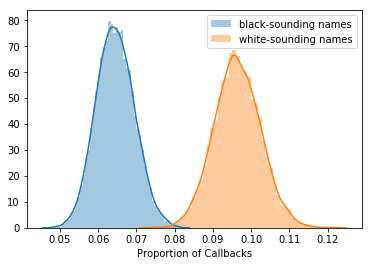

In [20]:
sns.distplot(results_b,
             norm_hist=True, 
             label='black-sounding names')
sns.distplot(results_w,
             norm_hist=True, 
             label='white-sounding names')

plt.xlabel('Proportion of Callbacks')
plt.legend()

#### Compute confidence intervals and margins of error around the proportions

Use significance level $\alpha = 0.05$

In [21]:
# Set alpha
alpha = 0.05

In [22]:
# Set upper bound and lower bound of percentiles
# for calculating confidence intervals, given alpha.
lb = (alpha/2)
ub = 1 - (alpha/2)
bounds = [lb, ub]

In [23]:
# Calculate 95% confidence interval for the proportion
# of resumes that get callbacks among the set of 
# resumes with black-sounding names.
np.percentile(results_b, bounds)

array([ 0.04866711,  0.05324116])

In [24]:
# Calculate 95% confidence interval for the proportion
# of resumes that get callbacks among the set of 
# resumes with white-sounding names.
np.percentile(results_w, bounds)

array([ 0.07519966,  0.08243978])

In [25]:
# Calculate the margin of error for the proportion
# of resumes that get callbacks among the set of 
# resumes with black-sounding names.
moe_b = (np.percentile(results_b, bounds)[1] - 
         np.percentile(results_b, bounds)[0]) / 2
moe_b

0.0022870249944752299

In [26]:
# Calculate the margin of error for the proportion
# of resumes that get callbacks among the set of 
# resumes with white-sounding names.
moe_w = (np.percentile(results_w, bounds)[1] - 
         np.percentile(results_w, bounds)[0]) / 2
moe_w

0.0036200559988913139

The 95% confidence interval for $p_b$ (*i.e.*, the proportion of resumes that get callbacks among the set of resumes with black-sounding names) is approximately [4.8%, 5.3%].

The 95% confidence interval for $p_w$ (*i.e.*, the proportion of resumes that get callbacks among the set of resumes with white-sounding names) is approximately [7.6%, 8.3%].

These two confidence intervals are non-overlapping.

The margin of error for $p_b$ is approximately 0.27%.

The margin of error for $p_w$ is approximately 0.35%.

#### Compute p-value

In [27]:
p = np.sum(results_b >= results_w) / len(results_b)
p

0.0

We cannot reject the null hypothesis:

+ $H_0$: $p_b < p_w$


### 4. Write a story describing the statistical significance in the context or the original problem.

Given a significance level of $\alpha = 0.05$, we found that the proportion of resumes that get callbacks among the set of resumes with black-sounding names ($p_b$) is less than the proportion of resumes that get callbacks among the set of resumes with white-sounding names ($p_w$).

Resumes with black-sounding names get callbacks approximately 4.8% to 5.3% of the time.

Resumes with white-sounding names get callbacks approximately 7.6% to 8.3% of the time.

### 5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

The analysis above does not imply that race/name is the most important factor in callback success, since no factors other than whether an applicant's name was "black-sounding" or "white-sounding" were analyzed.

I would amend the analysis by doing the following:

+ Analyze the relationships between the 'race' feature and the other features.

+ Analyze the relationships between the other features and the 'call' response variable.

+ Use logistic regression to control for the effect of other variables.